In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("D:\practice_data_set\dirtydata.csv")
df.head()

,Duration,Date,Pulse,Maxpulse,Calories,Current
0,60,'2020/12/01',110.0,130,409.1,1990
1,60,'2020/12/02',117.0,145,479.0,1991
2,60,'2020/12/03',103.0,135,340.0,1992
3,45,'2020/12/04',109.0,175,282.4,1993
4,45,'2020/12/05',117.0,148,406.0,1994


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     31 non-null     float64
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
 5   Current   32 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.6+ KB


In [16]:
df.isnull().sum()

Duration    0
Date        1
Pulse       1
Maxpulse    0
Calories    2
Current     0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
Current     0
dtype: int64

In [19]:
df1 = df.drop(columns=["Date","Calories","Current"],axis=1)

In [21]:
df1

,Duration,Pulse,Maxpulse
0,60,110.0,130
1,60,117.0,145
2,60,103.0,135
3,45,109.0,175
4,45,117.0,148
5,60,102.0,127
6,60,110.0,136
7,450,104.0,134
8,30,109.0,133
9,60,98.0,124


In [22]:
df1.describe()

,Duration,Pulse,Maxpulse
count,28.000000,28.000000,28.000000
mean,70.714286,104.035714,129.321429
std,74.705772,7.918484,13.394453
min,30.000000,92.000000,101.000000
25%,60.000000,100.000000,120.000000
50%,60.000000,102.500000,128.000000
75%,60.000000,108.250000,133.250000
max,450.000000,130.000000,175.000000


In [25]:
for i in df1["Duration"]:
    if i > 60 or i < 15:
        df1["Duration"].replace(i,60,inplace=True)

In [26]:
df1.describe()

,Duration,Pulse,Maxpulse
count,28.000000,28.000000,28.000000
mean,56.785714,104.035714,129.321429
std,7.480132,7.918484,13.394453
min,30.000000,92.000000,101.000000
25%,60.000000,100.000000,120.000000
50%,60.000000,102.500000,128.000000
75%,60.000000,108.250000,133.250000
max,60.000000,130.000000,175.000000


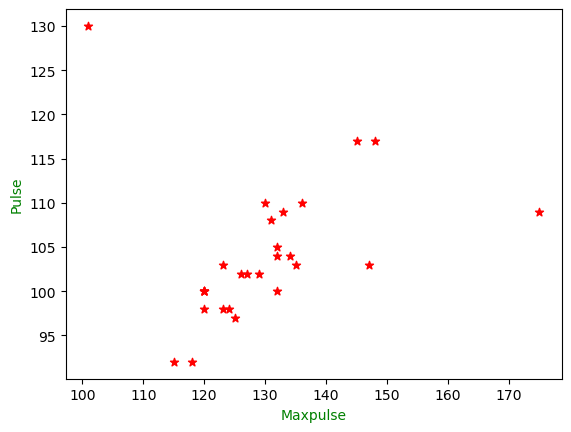

In [32]:
plt.scatter(df["Maxpulse"],df["Pulse"],marker="*",color="r")
plt.xlabel("Maxpulse",color='green')
plt.ylabel("Pulse",color='green')
plt.show()

In [33]:
from scipy import stats

In [34]:
stats.linregress(df1["Maxpulse"],df1["Pulse"])

LinregressResult(slope=0.12544697165185975, intercept=87.81273270173628, rvalue=0.21219891241171654, pvalue=0.2783369403665308, stderr=0.11329887226509822, intercept_stderr=14.7275616061668)

In [35]:
slope,intercept,r,p,stderr = stats.linregress(df1["Maxpulse"],df1["Pulse"])

In [36]:
slope

0.12544697165185975

In [37]:
intercept

87.81273270173628

In [38]:
r

0.21219891241171654

In [39]:
p

0.2783369403665308

In [40]:
stderr

0.11329887226509822

In [41]:
def prediction(x):
    return slope * x + intercept

In [42]:
prediction(28)

91.32524790798836

In [45]:
y_pred = list(map(prediction,df1["Maxpulse"]))

In [46]:
y_pred

[104.12083901647804,
 106.00254359125594,
 104.74807387473734,
 109.76595274081174,
 106.37888450621152,
 103.74449810152247,
 104.8735208463892,
 104.62262690308549,
 104.49717993143364,
 103.36815718656689,
 106.25343753455967,
 102.86636929995944,
 102.86636929995944,
 104.37173295978177,
 103.24271021491504,
 102.86636929995944,
 102.86636929995944,
 103.24271021491504,
 103.49360415821874,
 104.24628598812991,
 100.48287683857411,
 104.37173295978177,
 103.61905112987061,
 102.86636929995944,
 102.61547535665574,
 104.37173295978177,
 103.99539204482619,
 102.23913444170014]

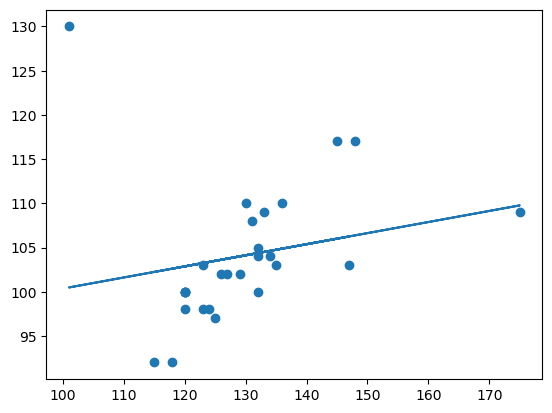

In [50]:
plt.scatter(df1["Maxpulse"],df1["Pulse"])
plt.plot(df1["Maxpulse"],y_pred)
plt.show()

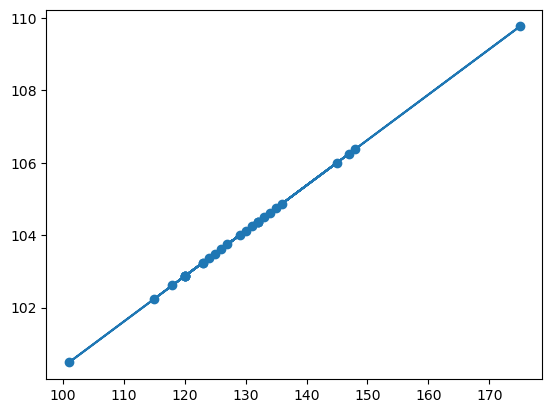

In [52]:
plt.scatter(df1["Maxpulse"],y_pred)
plt.plot(df1["Maxpulse"],y_pred)
plt.show()